<a href="https://colab.research.google.com/github/chun-ut/AI_Civil/blob/master/simpleCNN_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNNによる分類

## 下準備
1.   メニューから，ランタイムをpython3, GPUにセットする
2.   dog-vs-cats_small.zipをアップロードする（ドラッグアンドドロップ）【待ち時間かかります．何か代替の方法があればいいんだけど．】

## アップロードしたzipファイルの解凍

In [0]:
!unzip dog-vs-cats_small.zip

## パッケージのインストール
dltというのはGoogle Colaboratory限定で，Deep learningに有用なパッケージのpipによるインストールです．

また，本コードでkerasなどが使えるようにするように，パッケージをインストールします．

色々なWarningは以下出てきますが，Warningであれば大丈夫です．（Errorは大丈夫ではない）


In [0]:
pip install dlt

In [0]:
import dlt
import os
from keras import layers
from keras import models
from keras import optimizers
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

Using TensorFlow backend.


## Dataが入っているフォルダの設定
左のウィンドウで，dog-vs-cats_smallフォルダを確認して構造を理解するのは有益です．

In [0]:
train_cats_dir = 'dog-vs-cats_small/train/cats'
train_dogs_dir = 'dog-vs-cats_small/train/dogs'
validation_cats_dir = 'dog-vs-cats_small/validation/cats'
validation_dogs_dir = 'dog-vs-cats_small/validation/dogs'
test_cats_dir = 'dog-vs-cats_small/test/cats'
test_dogs_dir = 'dog-vs-cats_small/test/dogs'

train_dir = 'dog-vs-cats_small/train/'
validation_dir = 'dog-vs-cats_small/validation/'
test_dir = 'dog-vs-cats_small/test/'

print("train cat:{}".format(len(os.listdir(train_cats_dir))))
print("train dog:{}".format(len(os.listdir(train_dogs_dir))))

print("validation cat:{}".format(len(os.listdir(validation_cats_dir))))
print("validation dog:{}".format(len(os.listdir(validation_dogs_dir))))

print("test cat:{}".format(len(os.listdir(test_cats_dir))))
print("test dog:{}".format(len(os.listdir(test_dogs_dir))))

nb_classes = 2#クラスの数．ここでは，犬クラスと猫クラスなので２つなので２．

train cat:1001
train dog:1001
validation cat:500
validation dog:500
test cat:500
test dog:500


## Deep learningのCNNの層構造の定義
Sequential, Conv2D, MaxPooling2D, Flatten, Denseについては参考資料に記載．

また，compileも行う．categorical_crossentropyやRMSPropについても参考資料に記載．


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(2,activation="sigmoid"))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [0]:
model.compile(loss="categorical_crossentropy",#"binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["acc"])

## Datasetをどのように扱うか
Data augmentation（参考資料）の詳細など．

train, validation, testを分ける意味について．


In [0]:
#train_datagen = ImageDataGenerator(rescale=1./255)
#validation_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"#"binary"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"#"binary"
)

Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## CNNの学習

In [0]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=10,
                             validation_data=validation_generator,
                             validation_steps=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





100/100 [==============================] - 37s 369ms/step - loss: 0.6911 - acc: 0.5138 - val_loss: 0.6757 - val_acc: 0.6117
Epoch 2/10
100/100 [==============================] - 24s 239ms/step - loss: 0.6791 - acc: 0.5670 - val_loss: 0.6672 - val_acc: 0.5960
Epoch 3/10
100/100 [==============================] - 24s 238ms/step - loss: 0.6591 - acc: 0.6125 - val_loss: 0.6386 - val_acc: 0.6256
Epoch 4/10
100/100 [==============================] - 24s 240ms/step - loss: 0.6459 - acc: 0.6392 - val_loss: 0.6672 - val_acc: 0.5825
Epoch 5/10
100/100 [==============================] - 23s 229ms/step - loss: 0.6389 - acc: 0.6410 - val_loss: 0.6177 - val_acc: 0.6440
Epoch 6/10
100/100 [==============================] - 26s 256ms/step - loss: 0.6169 - acc: 0.6632 - val_loss: 0.5804 - val_acc: 0.6952
Epoch 7/10
100/100 [==============================] - 24s 239ms/step - loss: 0.6055 - ac

##Training loss/accuracyとValidation loss/accuracyの推移
過学習の判定などの議論

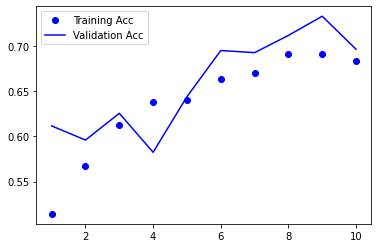

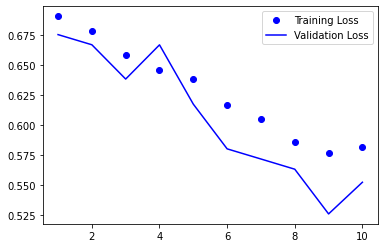

In [0]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc,"bo",label="Training Acc")
plt.plot(epochs, val_acc,"b",label="Validation Acc")
plt.legend()

plt.figure()

plt.plot(epochs,loss,"bo",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")
plt.legend()

plt.show()

## TestDataの解析
Testdataセットをまとめて解析，結果のCSV出力
何か１枚画像を与えたときの結果出力（TODO)
要するにまだ作りきっていません．

##MobileNetによるimagenet転移学習型解析
とりあえずソースコードはできてますが説明をつけていない．

In [0]:
from keras.applications import MobileNetV2
from keras.applications import MobileNet
from keras.callbacks import ModelCheckpoint

In [0]:
Mmodel = MobileNet(
    input_shape=(224, 224, 3),include_top=False, 
    alpha=1.0, depth_multiplier=1)

17227776/17225924 [==============================] - 0s 0us/step


In [0]:
nb_classes=2
top_model = Sequential()
top_model.add(Flatten(input_shape=Mmodel.output_shape[1:]))
top_model.add(Dense(nb_classes, activation='softmax'))

In [0]:
modelR = Model(input=Mmodel.input, output=top_model(Mmodel.output))
cp = ModelCheckpoint("weights.hdf5", monitor="val_loss", verbose=1,
                     save_best_only=True, save_weights_only=True)
modelR.compile(loss='categorical_crossentropy',#'binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  """Entry point for launching an IPython kernel.


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)




Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = modelR.fit_generator(
    train_generator,
    steps_per_epoch=100,
    nb_epoch=15,
    validation_data=validation_generator,
    validation_steps=50, callbacks=[cp])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=100, validation_data=<keras_pre..., validation_steps=50, callbacks=[<keras.ca..., epochs=15)`
  


Epoch 1/15
100/100 [==============================] - 61s 608ms/step - loss: 3.9381 - acc: 0.7485 - val_loss: 4.1125 - val_acc: 0.7411

Epoch 00001: val_loss improved from inf to 4.11246, saving model to weights.hdf5
Epoch 2/15
100/100 [==============================] - 52s 524ms/step - loss: 3.4461 - acc: 0.7776 - val_loss: 2.9883 - val_acc: 0.8125

Epoch 00002: val_loss improved from 4.11246 to 2.98833, saving model to weights.hdf5
Epoch 3/15
100/100 [==============================] - 53s 532ms/step - loss: 4.3233 - acc: 0.7227 - val_loss: 6.1162 - val_acc: 0.6161

Epoch 00003: val_loss did not improve from 2.98833
Epoch 4/15
100/100 [==============================] - 54s 538ms/step - loss: 4.6150 - acc: 0.7052 - val_loss: 4.4130 - val_acc: 0.7088

Epoch 00004: val_loss did not improve from 2.98833
Epoch 5/15
100/100 [==============================] - 52s 519ms/step - loss: 5.0859 - acc: 0.6742 - val_loss: 5.6793 - val_acc: 0.6383

Epoch 00005: val_loss did not improve from 2.98833
E

In [0]:
modelR.load_weights('weights.hdf5')


In [0]:
total = 0.
ok_count = 0.
label_list=[]
answer_list=[]

for dir in os.listdir(test_dir):

    dir1 = test_dir + dir 
    label = 0

    if dir1 == test_cats_dir:
        label = 0
    elif dir1 == test_dogs_dir:
        label = 1

    for file in os.listdir(dir1):
        label_list.append(label)
        filepath = dir1 + "/" + file
        image = np.array(Image.open(filepath).resize((224, 224)))
        #print(filepath)
        result = modelR.predict(np.array([image / 255.]))
        true_class = np.argmax(result[0],0)
        answer_list.append(true_class)
        #print("label:", label, "result:", true_class)

        total += 1.

        if label == true_class:
            ok_count += 1.
        #print(ok_count / total * 100)

print("seikai: ", ok_count / total * 100, "%")



seikai:  79.4 %


In [0]:

# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

modelR.summary()

1
2
[1, 2]


In [0]:
label_np = np.array(label_list).reshape(1000,1)
answer_np = np.array(answer_list).reshape(1000,1)
print(label_np.shape)
total_list =np.concatenate([label_np, answer_np],1)
print(total_list.shape)
np.savetxt('np_savetxt.txt', total_list)

(1000, 1)
(1000, 2)


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_list, answer_list)
print(cm)

[[400 100]
 [106 394]]
